# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import glob
import os

import matplotlib.pyplot as plt

# Read files

In [2]:
# Folder where the .tsv files are located
folder_path = './data' 

# Get all .tsv files from the folder
file_list = glob.glob(os.path.join(folder_path, '*.tsv'))

# Create an empty dictionary to store each dataframe separately
dataframes_dict = {}

# Loop over each file and read the .tsv file into the dictionary
for file in file_list:
    file_name = os.path.basename(file)  # Get the base name of the file
    df = pd.read_csv(file, delimiter='\t')  # Read as a .tsv file
    df = df.iloc[:,1]
    dataframes_dict[file_name] = df 

# Create a list to store original file names and their corresponding row counts
file_row_counts = []

for file_name, df in dataframes_dict.items():
    row_count = len(df)  # Calculate the number of rows in each DataFrame
    file_row_counts.append((file_name, row_count))  # Append a tuple of (file_name, row_count)

# Combine files into one dataframe

In [3]:
# Concatenate all dataframes into one series
combined_series = pd.concat(dataframes_dict.values(), ignore_index=True)

# Calculate average number of words per document

In [4]:
word_counts = combined_series.dropna().apply(lambda x: len(str(x).split()))  # Apply split and len to each non-null entry

# Calculate the average number of words
average_word_length = word_counts.mean()

print(f'The average number of words in the entries is {average_word_length:.2f} words.')

The average number of words in the entries is 636.21 words.


# Calculate average number of characters per document

In [5]:
# Calculate the length of each entry (number of characters)
lengths = combined_series.dropna().apply(len)  # Apply len to each non-null entry

# Calculate the average length
average_length = lengths.mean()

print(f'The average number of characters in the entries is {average_length:.2f} characters.')

The average number of characters in the entries is 3863.92 characters.


# Calulate average number of words per file

In [20]:
import plotly.graph_objs as go
import plotly.io as pio

# Create a dictionary to store the mean row lengths for each file
mean_words = {filename: np.mean([len(i.split()) for i in dataframe.values]) for filename, dataframe in dataframes_dict.items()}

print('Average number of words in each file:')

# Print mean row lengths
for filename, mean_length in mean_words.items():
    print(f'{filename} - {mean_length:.2f}')

row_count_df = pd.DataFrame(file_row_counts, columns=['File Name', 'Row Count'])

mean_words_length_df = pd.DataFrame({
    'File Name': list(mean_words.keys()),
    'Mean Length': list(mean_words.values())
})

# Merge the two DataFrames on 'File Name'
combined_df = pd.merge(row_count_df, mean_words_length_df, on='File Name')

# Sort the combined DataFrame by 'Row Count'
sorted_combined_df = combined_df.sort_values(by='Row Count', ascending=True)


def viz1():

    fig = go.Figure(
        data=[
            go.Bar(
                x=sorted_combined_df['File Name'], 
                y=sorted_combined_df['Mean Length'], 
                text=sorted_combined_df['Mean Length'].round(2),
                textposition='outside',
                marker_color='skyblue'
            )
        ]
    )

    # Update layout and axes
    fig.update_yaxes(title_text='Number of Words', range=[0, max(sorted_combined_df['Mean Length'])*1.2], tickprefix=' ', showgrid=True, gridcolor='#E5E5E5', tickfont=dict(size=10))

    fig.update_xaxes(title_text='Filename', tickprefix=' ', showgrid=True, gridcolor='#E5E5E5', tickfont=dict(size=10))

    fig.update_annotations(font_size=12)

    fig.update_layout(
        height=500, 
        width=750, 
        title_text='Average Number of Words per File',
        title_font_size=18,
        title_x=0.5,  
        title_y=0.9,
        margin=dict(l=80, r=20, t=115, b=100),
        plot_bgcolor='#FDFDFD',
        paper_bgcolor='#FDFDFD',
        font=dict(size=10),
        showlegend=False
    )

    pio.write_image(fig, "./images/Viz1.png")

    # Display the plot
    fig.show()

# Call the function to display the plot
viz1()

Average number of words in each file:
threehundred.tsv - 673.80
hundred.tsv - 709.06
thirty.tsv - 717.38
five.tsv - 3.50
threek.tsv - 642.73
thirtyk.tsv - 636.86
onek.tsv - 656.16
tenk.tsv - 640.88
hundredk.tsv - 634.97


# Calulate average number of characters per file

In [19]:
# Create a dictionary to store the mean row lengths for each file
mean_characters = {filename: np.mean([len(row) for row in dataframe.values]) for filename, dataframe in dataframes_dict.items()}

print('Average number of words in each file:')

# Print mean row lengths
for filename, mean_length in mean_characters.items():
    print(f'{filename} - {mean_length:.2f}')

row_count_df = pd.DataFrame(file_row_counts, columns=['File Name', 'Row Count'])

mean_characters_length_df = pd.DataFrame({
    'File Name': list(mean_characters.keys()),
    'Mean Length': list(mean_characters.values())
})

# Merge the two DataFrames on 'File Name'
combined_df = pd.merge(row_count_df, mean_characters_length_df, on='File Name')

# Sort the combined DataFrame by 'Row Count'
sorted_combined_df = combined_df.sort_values(by='Row Count', ascending=True)


def viz2():

    fig = go.Figure(
        data=[
            go.Bar(
                x=sorted_combined_df['File Name'], 
                y=sorted_combined_df['Mean Length'], 
                text=sorted_combined_df['Mean Length'].round(2),
                textposition='outside',
                marker_color='skyblue'
            )
        ]
    )

    # Update layout and axes
    fig.update_yaxes(title_text='Number of Characters', range=[0, max(sorted_combined_df['Mean Length'])*1.2], tickprefix=' ', showgrid=True, gridcolor='#E5E5E5', tickfont=dict(size=10))

    fig.update_xaxes(title_text='Filename', tickprefix=' ', showgrid=True, gridcolor='#E5E5E5', tickfont=dict(size=10))

    fig.update_annotations(font_size=12)

    fig.update_layout(
        height=500, 
        width=750, 
        title_text='Average Number of Characters per File',
        title_font_size=18,
        title_x=0.5,  
        title_y=0.9,
        margin=dict(l=80, r=20, t=115, b=100),
        plot_bgcolor='#FDFDFD',
        paper_bgcolor='#FDFDFD',
        font=dict(size=10),
        showlegend=False
    )

    pio.write_image(fig, "./images/Viz2.png")

    # Display the plot
    fig.show()

# Call the function to display the plot
viz2()


Average number of words in each file:
threehundred.tsv - 4095.29
hundred.tsv - 4236.17
thirty.tsv - 4269.41
five.tsv - 24.00
threek.tsv - 3913.11
thirtyk.tsv - 3866.70
onek.tsv - 3971.57
tenk.tsv - 3893.38
hundredk.tsv - 3856.60


# Histogram of number of words per file

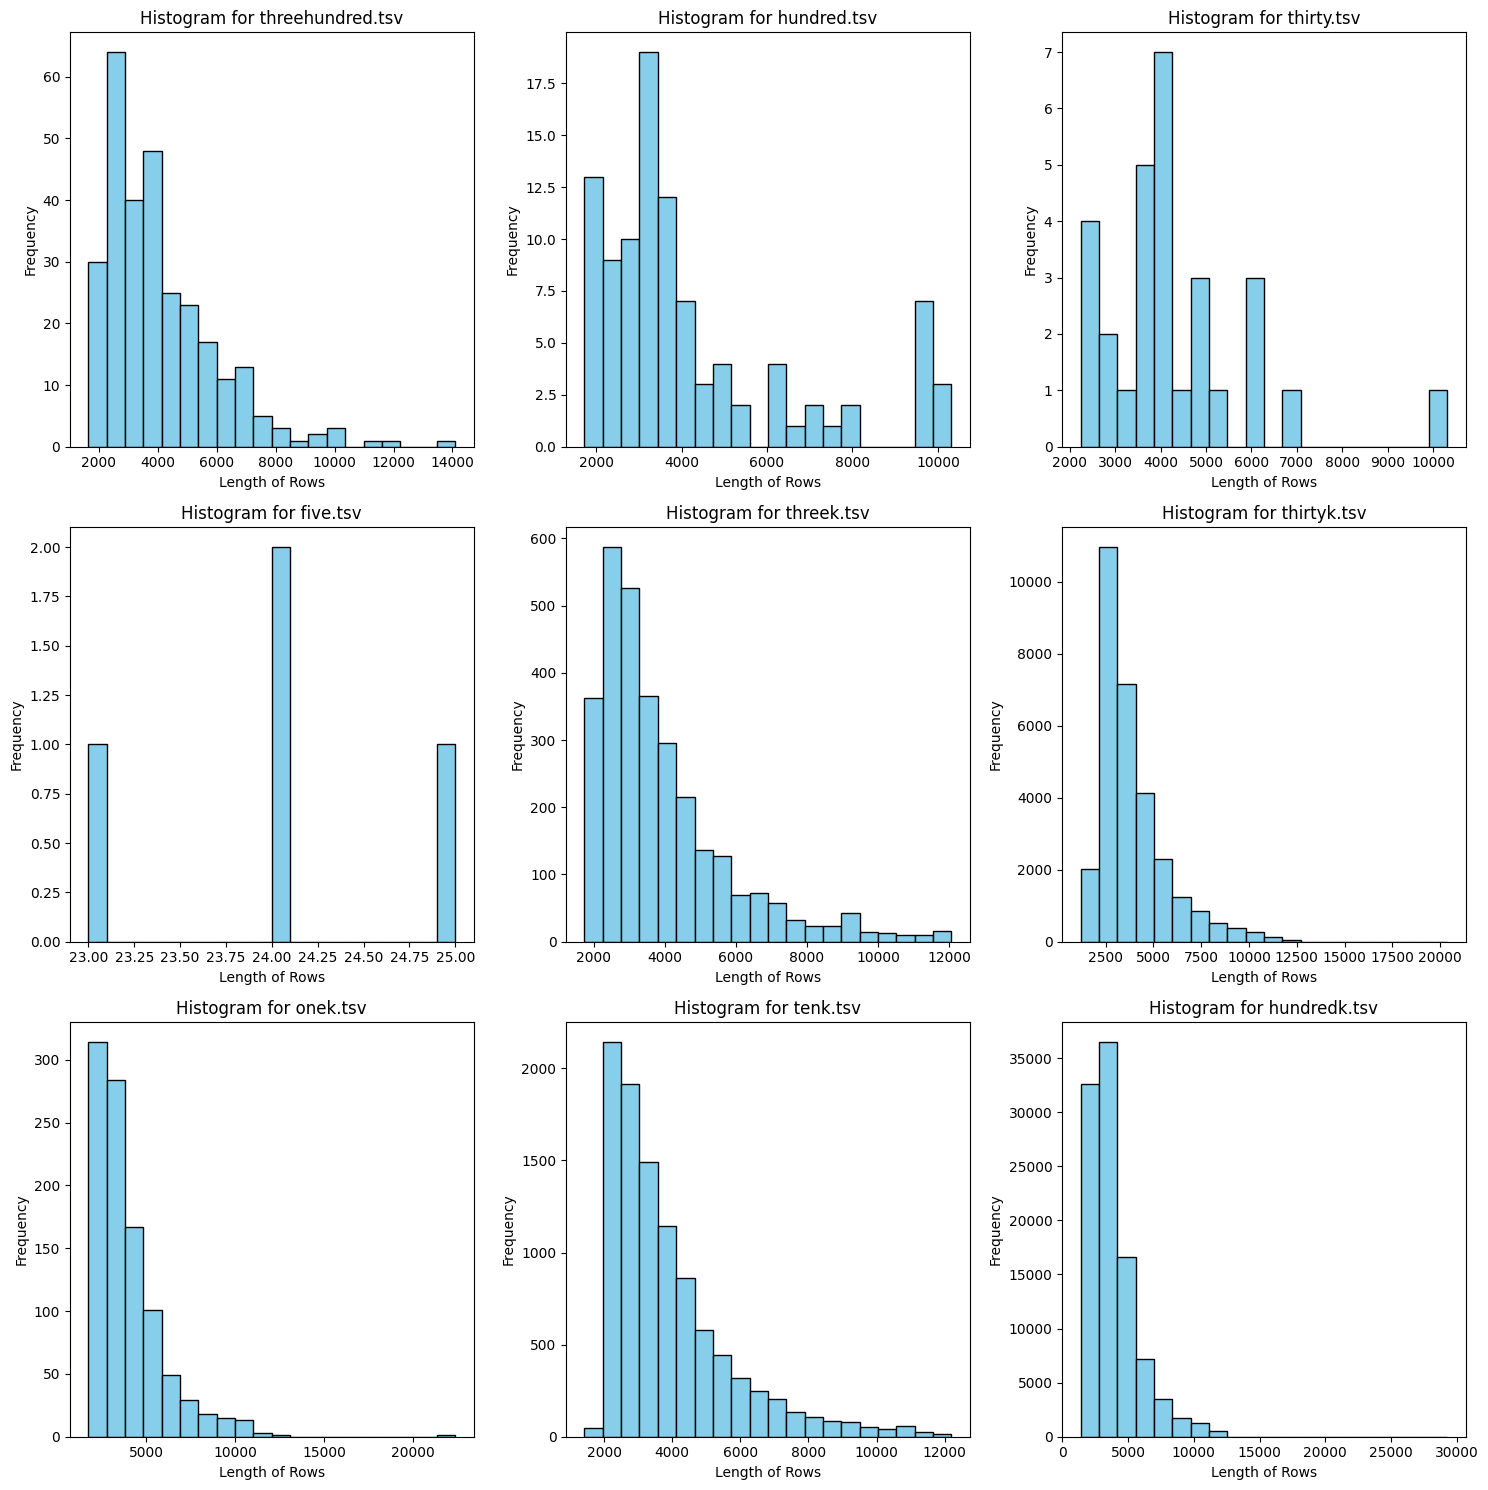

In [30]:
row_lengths = {filename: [len(row) for row in dataframe.values] for filename, dataframe in dataframes_dict.items()}

# Create subplots with 3 rows and 3 columns (since you have 9 files)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Iterate through each file and its corresponding row lengths in the dictionary
for i, (filename, lengths) in enumerate(row_lengths.items()):
    axes[i].hist(lengths, bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram for {filename}')
    axes[i].set_xlabel('Length of Rows')
    axes[i].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Text data cleaning

In [31]:
import pandas as pd
import glob
import os
from collections import Counter
import re
from nltk.corpus import stopwords

# Function to clean and tokenize text
def tokenize_text(text):

    stop_words = set(stopwords.words('english'))
    # Remove non-alphabetic characters and split the text into words
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower()) # Convert to lowercase and tokenize
    words = [word for word in words if word not in stop_words]
    return words

# Function to get top 10 most common words
def get_top_10_words(text_series):
    # Combine all text from the dataframe into one string
    combined_text = ' '.join(text_series.dropna().astype(str))  # Drop NaNs and convert to strings
    words = tokenize_text(combined_text)  # Tokenize the text
    word_counts = Counter(words)  # Count word frequencies
    return word_counts.most_common(10)  # Get the 10 most common words

# Dictionary to store top 10 words for each file
top_10_words_per_file = {}

# Save top 10 most common words for each file

In [32]:
for file_name, df in dataframes_dict.items():
    # Assuming text is in a specific column, e.g., 'text' (you might need to adjust this based on your data)
    top_words = get_top_10_words(df)  # Using the first column as an example
    top_10_words_per_file[file_name] = top_words

In [33]:
top_10_words_per_file

{'threehundred.tsv': [('new', 481), ('said', 476), ('one', 418), ('also', 354), ('year', 339), ('time', 336), ('people', 310), ('first', 292), ('would', 259), ('get', 253)], 'hundred.tsv': [('get', 229), ('said', 207), ('like', 206), ('new', 205), ('also', 204), ('one', 170), ('would', 162), ('year', 159), ('time', 150), ('life', 144)], 'thirty.tsv': [('said', 74), ('one', 57), ('time', 55), ('place', 49), ('first', 47), ('new', 46), ('get', 43), ('people', 40), ('powelson', 38), ('year', 38)], 'five.tsv': [('cherry', 2), ('paradise', 2), ('garcia', 1), ('ice', 1), ('cream', 1), ('two', 1), ('pumpkin', 1), ('tarts', 1), ('cheeseburgers', 1), ('cheeseburger', 1)], 'threek.tsv': [('said', 6589), ('one', 4599), ('new', 4210), ('also', 3683), ('year', 3389), ('time', 3062), ('first', 2862), ('com', 2850), ('would', 2821), ('people', 2783)], 'thirtyk.tsv': [('said', 66844), ('one', 45829), ('new', 42164), ('also', 36494), ('year', 33765), ('time', 31816), ('first', 29810), ('would', 27655),